In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graph-data/manhatten.graphml
/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
import os
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from sklearn.cluster import KMeans
import folium
from folium.plugins import HeatMap
import seaborn as sns

In [3]:
df = pd.read_csv('../input/nyc-taxi-trip-duration/train.zip')

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.size

16045084

In [6]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of                 id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0   

In [8]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

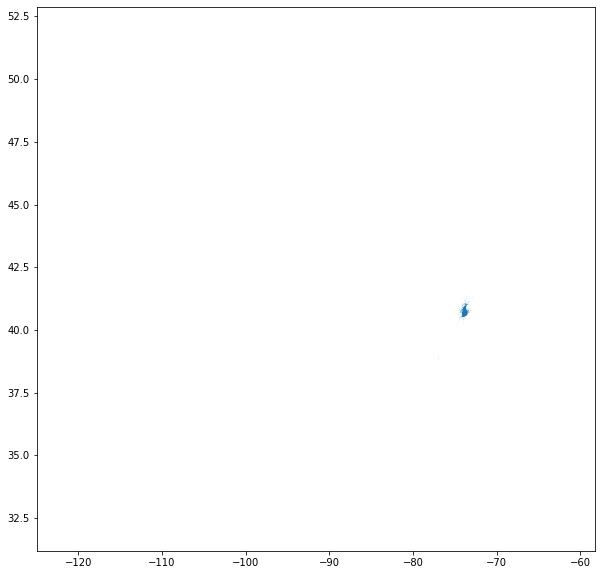

In [9]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.show()

In [10]:
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
df = df[(df.pickup_longitude> xlim[0]) & (df.pickup_longitude < xlim[1])]
df = df[(df.dropoff_longitude> xlim[0]) & (df.dropoff_longitude < xlim[1])]
df = df[(df.pickup_latitude> ylim[0]) & (df.pickup_latitude < ylim[1])]
df = df[(df.dropoff_latitude> ylim[0]) & (df.dropoff_latitude < ylim[1])]

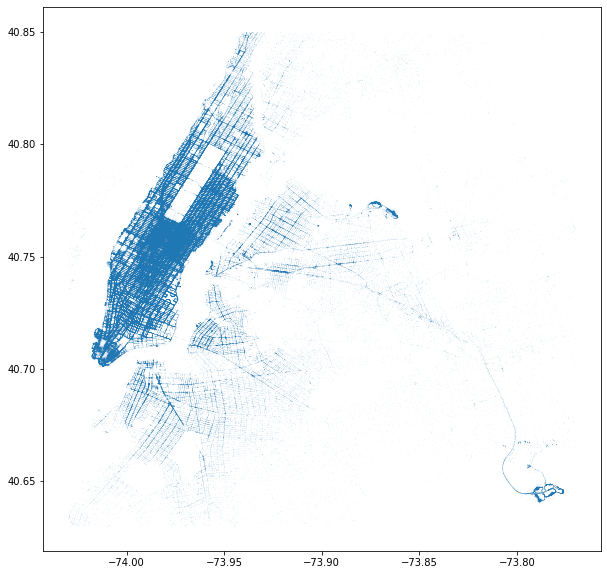

In [11]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.show()

In [12]:
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

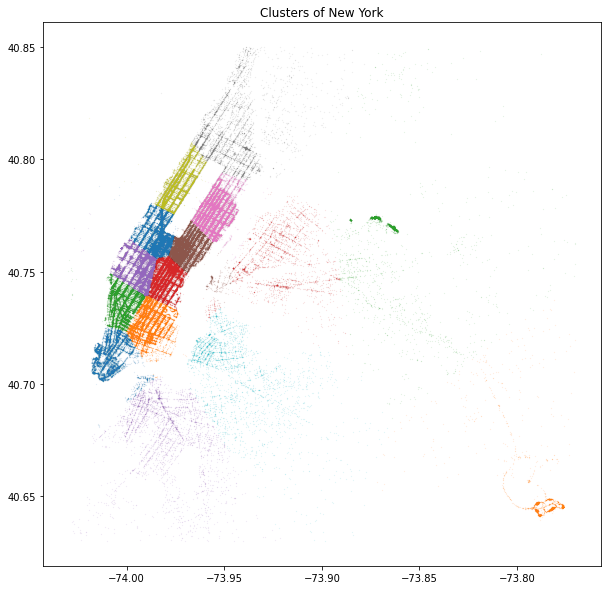

In [13]:
kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

loc_df = loc_df.sample(200000)
plt.figure(figsize = (10,10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.3, markersize = 0.3)

plt.title('Clusters of New York')
plt.show()

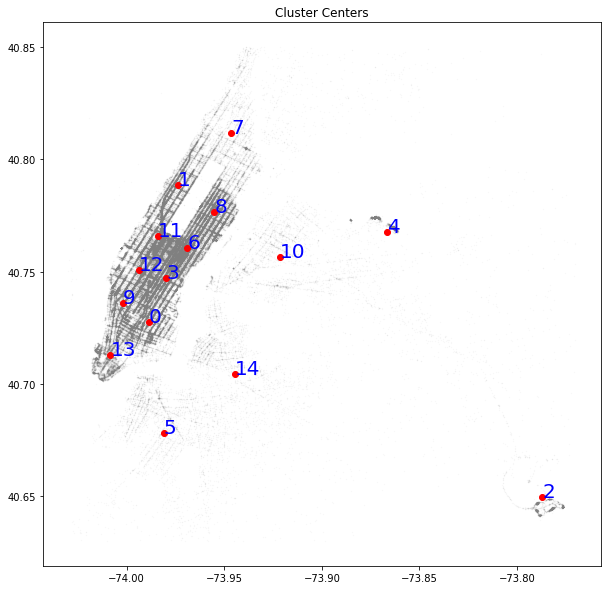

In [14]:
fig,ax = plt.subplots(figsize = (10,10))
for label in loc_df.label.unique():
    ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.4, markersize = 0.1, color = 'gray')
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title('Cluster Centers')
plt.show()

In [15]:
df['pickup_latitude_round'] = df['pickup_latitude'].apply(lambda x : round(x, 2))
df['pickup_longitude_round'] = df['pickup_longitude'].apply(lambda x : round(x, 2))

pickup = df.groupby(['pickup_latitude_round','pickup_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})
pickup

,pickup_latitude_round,pickup_longitude_round,Num_Trips
0,40.63,-74.03,2
1,40.63,-74.02,6
2,40.63,-74.01,4
3,40.63,-73.98,8
4,40.63,-73.97,23
...,...,...,...
460,40.85,-73.89,1
461,40.85,-73.88,2
462,40.85,-73.87,3
463,40.85,-73.86,2


In [16]:
pickup_map = folium.Map(location = [40.730610,-73.935242], zoom_start = 10)

heatmap = HeatMap(list(zip(pickup.pickup_latitude_round.values, 
                           pickup.pickup_longitude_round.values,
                           pickup.Num_Trips.values.astype(float))),
                  min_opacity = 0.3,
                  radius = 5, blur = 10,
                  max_zoom = 1)

pickup_map.add_child(heatmap)

pickup_map

In [17]:
import networkx as nx
G = nx.read_graphml('../input/graph-data/manhatten.graphml')

In [18]:
nx.info(G)

'Name: Manhattan, New York, USA\nType: MultiDiGraph\nNumber of nodes: 4426\nNumber of edges: 9626\nAverage in degree:   2.1749\nAverage out degree:   2.1749'

In [19]:
G_simple = nx.Graph(G)
nx.info(G_simple)

'Name: Manhattan, New York, USA\nType: Graph\nNumber of nodes: 4426\nNumber of edges: 7886\nAverage degree:   3.5635'

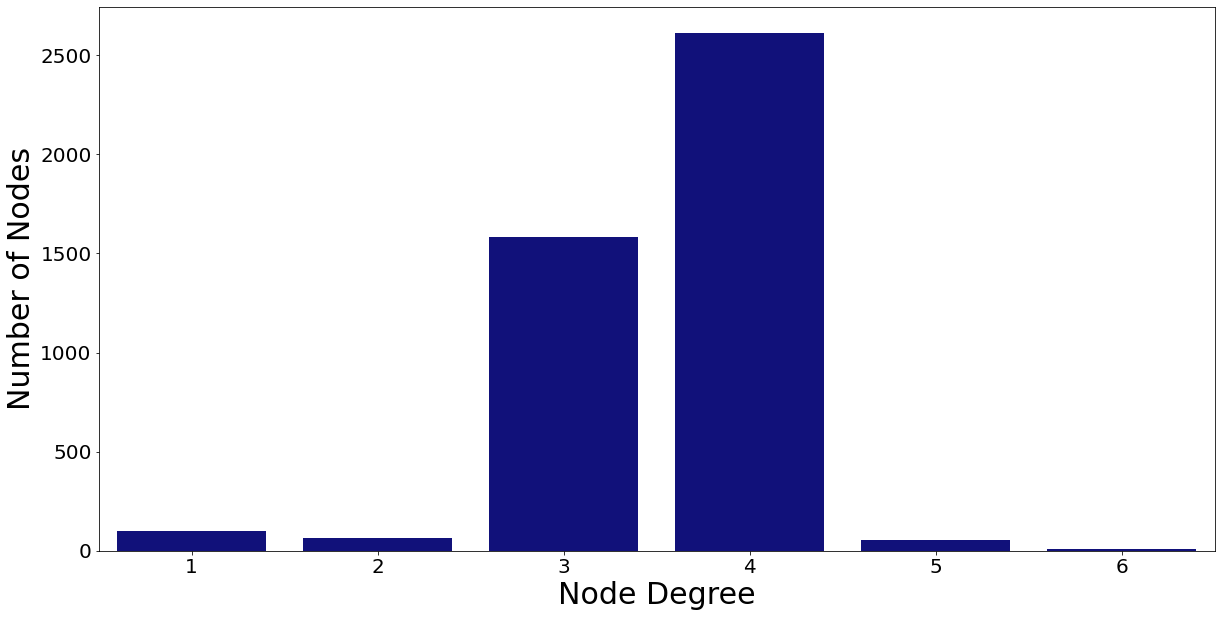

In [20]:
from collections import Counter
degrees = G_simple.degree()
degree_values = [v for k, v in degrees]
degree_dic = Counter(degree_values)

degree_hist = pd.DataFrame({"degree": list(degree_dic.values()),
                            "Number of Nodes": list(degree_dic.keys())})
plt.figure(figsize=(20,10))
sns.barplot(y = 'degree', x = 'Number of Nodes', 
              data = degree_hist, 
              color = 'darkblue')
plt.xlabel('Node Degree', fontsize=30)
plt.ylabel('Number of Nodes', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

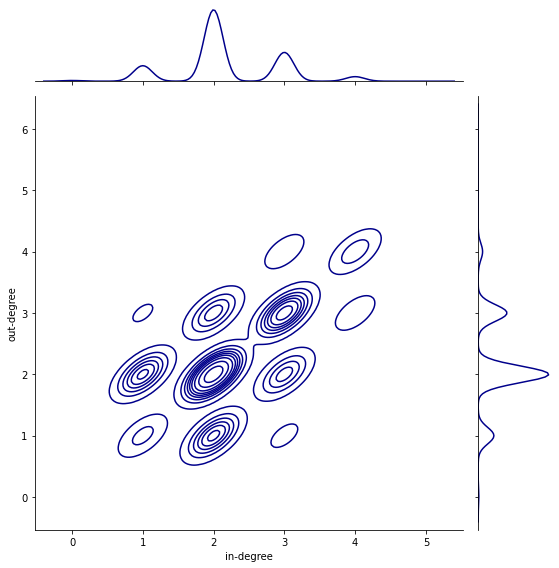

In [21]:
insTemp = list(G.in_degree(list(G.nodes)))
outsTemp = list(G.out_degree(list(G.nodes)))
ins = []
outs = []
for i, j in insTemp:
    ins.append(j)
for i, j in outsTemp:
    outs.append(j)
degrees = pd.DataFrame({"in-degree": ins, "out-degree": outs})

fig = sns.jointplot(x="in-degree",y="out-degree",data=degrees,kind="kde", color = 'darkblue',height=8)

In [22]:
for i in G_simple:
    print(i)
    print(G_simple[i])
    break

42459137
{'42447105': {'name': 'East 79th Street', 'length': '142.034638279', 'osmid': '5673456', 'highway': 'secondary', 'oneway': 'False', 'key': 0}, '42438490': {'lanes': '3', 'osmid': '46240204', 'length': '87.3899087392', 'oneway': 'True', 'highway': 'secondary', 'name': 'Park Avenue', 'key': 0}, '596776089': {'name': 'East 79th Street', 'length': '23.1325137021', 'osmid': '5673456', 'highway': 'secondary', 'oneway': 'False', 'key': 0}, '42436914': {'lanes': '3', 'osmid': '46240204', 'length': '87.6929536955', 'oneway': 'True', 'highway': 'secondary', 'name': 'Park Avenue', 'key': 0}}


In [23]:
nx.density(G_simple)

0.0008053081304362256

In [24]:
nx.density(G)

0.0004914973410841433

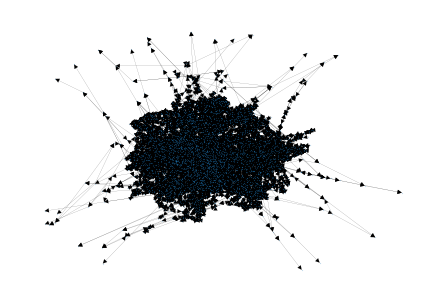

In [25]:
nx.draw(G, node_size=0.01, width=0.1)

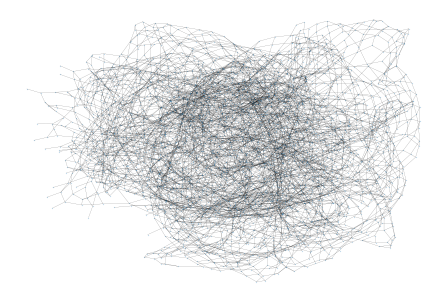

In [26]:
nx.draw(G_simple, node_size=0.01, width=0.1)

In [27]:
nodes = list(G.nodes())
nodes[:10]

['42459137',
 '1773060099',
 '373268484',
 '42426374',
 '42446849',
 '42429100',
 '42442764',
 '42452598',
 '278609934',
 '42442770']

In [28]:
G.nodes['42442770']

{'y': '40.8537128',
 'x': '-73.9267875',
 'osmid': '42442770',
 'highway': 'traffic_signals'}

In [29]:
nx.diameter(G_simple)

88

In [30]:
nx.algorithms.components.number_connected_components(G_simple)

1

In [31]:
nx.node_connectivity(G_simple)

1

In [32]:
nx.algebraic_connectivity(G_simple)

0.0003423271822603706

In [33]:
nx.average_shortest_path_length(G_simple)

35.046706033428556

In [34]:
between = nx.betweenness_centrality(G_simple)

In [35]:
def great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009):

    phi1 = np.deg2rad(90 - lat1)

    phi2 = np.deg2rad(90 - lat2)

    theta1 = np.deg2rad(lng1)
    theta2 = np.deg2rad(lng2)

    cos = (np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) + np.cos(phi1) * np.cos(phi2))
    arc = np.arccos(cos)

    distance = arc * earth_radius
   
    return distance


def get_nearest_node(G, point, return_dist=False):

    coords = np.array([[node, data['x'], data['y']] for node, data in G.nodes(data=True)])
    df = pd.DataFrame(coords, columns=['node', 'x', 'y']).set_index('node')
    df['reference_y'] = point[0]
    df['reference_x'] = point[1]

    distances = great_circle_vec(lat1=df['reference_y'],
                                 lng1=df['reference_x'],
                                 lat2=df['x'].astype('float'),
                                 lng2=df['y'].astype('float'))
  
    nearest_node = int(distances.idxmin())
  
    if return_dist:
        return nearest_node, distances.loc[nearest_node]
    else:
        return nearest_node

In [36]:
train = pd.read_csv('../input/nyc-taxi-trip-duration/train.zip')
for index, row in train[24:25].iterrows():

    pick_point = ( row['pickup_longitude'],row['pickup_latitude'])
    drop_point = ( row['dropoff_longitude'],row['dropoff_latitude'])
    
    pick_node = get_nearest_node(G, pick_point)
    drop_node = get_nearest_node(G, drop_point)
   
    try:
        route = nx.shortest_path(G, str(pick_node), str(drop_node))
        print("Shortest Path:")
        print(route)
        
    except:
        print("Some Error")
        #handle error
        pass
    
    print("Betweenness Centrality for each node on the path")
    node_bet = []
    for edge in route:
        node_bet.append(between[edge])
    print(node_bet)

Shortest Path:
['42448238', '42435514', '42450028', '42447132', '42458766', '596776132', '42446036', '42449187', '42433927', '42435310', '42443353', '42442480', '42434160', '1061531637', '1061531810', '1061531768', '1061531682', '1061531731', '42428695', '42431067', '42441535', '595314125', '42425348', '2029349908', '595314119', '42441382', '42441310', '5004570627', '5004570651', '42452276', '5004570644', '5004570630', '42428814', '561035335', '627905367', '1506445762', '1504153604', '561035338', '1506599378', '1506599377', '561035342', '561035343', '561035344', '561035345', '561035346', '561035347', '42428880', '42434105', '42424679', '42424698', '587934347', '42424823', '60928432', '60927650', '60928040', '60916829', '595729853', '374482644', '374472690', '42441000', '42441007', '42441009', '595729838', '42429215', '42429216', '42429217', '42429220', '42429222', '42429226', '42429228', '42429231', '42429236', '42429242', '42429244', '42446231', '42444880', '42446228']
Betweenness Cen

In [37]:
for i in route:
    print(G[i])
    print('\n')

{'42435514': {0: {'osmid': '196117089', 'length': '80.8167663022', 'name': '3rd Avenue', 'highway': 'primary', 'oneway': 'True', 'key': 0}}, '42447126': {0: {'osmid': '46694766', 'length': '154.503266785', 'name': 'East 83rd Street', 'highway': 'residential', 'oneway': 'True', 'key': 0}}}


{'42435516': {0: {'osmid': '46334580', 'length': '215.678864501', 'name': 'East 84th Street', 'highway': 'residential', 'oneway': 'True', 'key': 0}}, '42450028': {0: {'osmid': '196117089', 'length': '80.2166763044', 'name': '3rd Avenue', 'highway': 'primary', 'oneway': 'True', 'key': 0}}}


{'42429338': {0: {'osmid': '196117089', 'length': '88.0621190762', 'name': '3rd Avenue', 'highway': 'primary', 'oneway': 'True', 'key': 0}}, '42447132': {0: {'osmid': '56578204', 'length': '154.369916896', 'name': 'East 85th Street', 'highway': 'residential', 'oneway': 'True', 'key': 0}}}


{'42435509': {0: {'osmid': '387128267', 'length': '80.2183616102', 'name': 'Lexington Avenue', 'highway': 'secondary', 'onew

In [38]:
for i in route:
    print(G.nodes[i])

{'y': '40.7768695', 'x': '-73.9554065', 'osmid': '42448238', 'highway': 'traffic_signals'}
{'y': '40.7775056', 'x': '-73.9549422', 'osmid': '42435514', 'highway': 'traffic_signals'}
{'y': '40.778137', 'x': '-73.9544814', 'osmid': '42450028', 'highway': 'traffic_signals'}
{'y': '40.7788122', 'x': '-73.9560833', 'osmid': '42447132', 'highway': 'traffic_signals'}
{'y': '40.7794356', 'x': '-73.9575618', 'osmid': '42458766', 'highway': 'traffic_signals'}
{'y': '40.7795391', 'x': '-73.9578075', 'osmid': '596776132', 'highway': 'traffic_signals'}
{'y': '40.780173', 'x': '-73.959311', 'osmid': '42446036', 'highway': 'traffic_signals'}
{'y': '40.7808558', 'x': '-73.9609186', 'osmid': '42449187', 'highway': 'traffic_signals'}
{'y': '40.7815298', 'x': '-73.9627815', 'osmid': '42433927'}
{'y': '40.7853033', 'x': '-73.9693488', 'osmid': '42435310', 'highway': 'traffic_signals'}
{'y': '40.7864873', 'x': '-73.9721756', 'osmid': '42443353', 'highway': 'traffic_signals'}
{'y': '40.7876846', 'x': '-73.9

In [39]:
c=nx.closeness_centrality(G_simple)
cs=dict(sorted(c.items(), key=lambda item: item[1]))
for x in list(cs)[-10:]:
  print ("{}, {}".format(x,  cs[x]))

42450688, 0.04107033468842234
42433422, 0.04114901056390418
42424145, 0.041497083481816306
42450675, 0.04152668030556129
42438809, 0.041672945076471034
370924677, 0.04179812215442163
42450634, 0.04184080636925812
371188320, 0.04195147849334939
42436719, 0.041976550049328376
406006393, 0.042008031365996755


In [40]:
print(G.nodes['1773055865'])

{'y': '40.7135191', 'x': '-73.9986811', 'osmid': '1773055865', 'highway': 'traffic_signals'}


In [41]:
G.nodes['42433422']

{'y': '40.7792986', 'x': '-73.9435726', 'osmid': '42433422'}

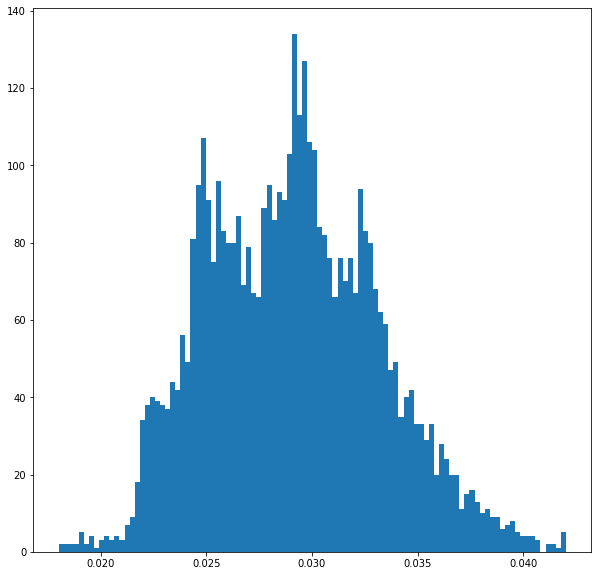

In [42]:
fig = plt.figure(1, figsize=(10,10))
h=plt.hist(c.values(),100)

In [43]:
bs=dict(sorted(between.items(), key=lambda item: item[1]))
#top-10
for x in list(bs)[-10:]:
  print ("{}, {}".format(x,  bs[x]))

3631837584, 0.3230585202760951
42433422, 0.3292071244814445
42438809, 0.3345433849046528
42450634, 0.3404011284347514
371188320, 0.3485737315104912
42424145, 0.3517092806401605
42450675, 0.3582936356930097
406006393, 0.3839524783111164
370924677, 0.38959646002380577
42436719, 0.4012301458343994


In [44]:
G.nodes['42436719']

{'y': '40.7551764',
 'x': '-73.9619239',
 'ref': '11',
 'osmid': '42436719',
 'highway': 'motorway_junction'}

In [45]:
G['42436719']

AdjacencyView({'42436716': {0: {'geometry': 'LINESTRING (-73.9619239 40.7551764, -73.9621095 40.7550929, -73.96224239999999 40.7549674, -73.9623627 40.7548645, -73.96243870000001 40.7548296, -73.9625362 40.7548158, -73.96266900000001 40.7548496, -73.962864 40.7549314)', 'length': '97.7731299313', 'osmid': '5670481', 'highway': 'motorway_link', 'oneway': 'True', 'key': 0}}, '370924677': {0: {'lanes': '3', 'name': 'FDR Drive', 'geometry': 'LINESTRING (-73.9619239 40.7551764, -73.9623223 40.7547774, -73.9625193 40.7545539, -73.9626823 40.7543724, -73.9628975 40.7541276, -73.96318100000001 40.7537755, -73.9640192 40.7529089)', 'length': '307.943262129', 'oneway': 'True', 'highway': 'motorway', 'osmid': '[34768995, 32939517]', 'key': 0}}})

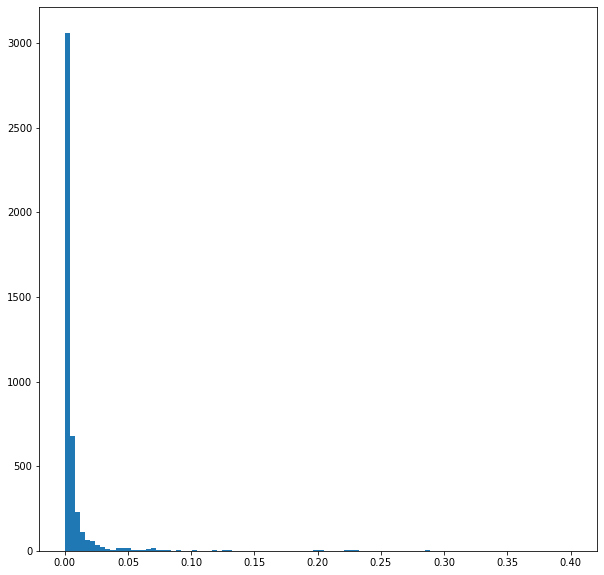

In [46]:
fig = plt.figure(1, figsize=(10,10))
h=plt.hist(bs.values(),100)

In [47]:
pr=nx.pagerank(G_simple)

In [48]:
prs=dict(sorted(pr.items(), key=lambda item: item[1]))
for x in list(prs)[-10:]:
  print ("{}, {}".format(x,pr[x]))

1773055865, 0.0003445052997168386
1061531448, 0.0003460913063252789
42427412, 0.00035198829343730274
42423020, 0.0003543653656339146
42429215, 0.0003599995507298768
3630249566, 0.00036166559026966144
2512378850, 0.00036775398971270276
42431257, 0.00036965400875270957
595105499, 0.0003789996685474316
2481865390, 0.0003982706799751397


In [49]:
print(list(G.nodes)[1])
G[list(G.nodes)[1]]

1773060099


AdjacencyView({'1773055865': {0: {'maxspeed': '25 mph', 'name': 'Chatham Square', 'geometry': 'LINESTRING (-73.9980743 40.7137811, -73.99848129999999 40.7136054, -73.9986811 40.7135191)', 'length': '58.8591127582', 'oneway': 'True', 'highway': 'primary', 'osmid': '222299242', 'key': 0}}, '588455742': {0: {'maxspeed': '25 mph', 'osmid': '5670189', 'length': '14.3823263064', 'oneway': 'False', 'highway': 'secondary', 'name': 'East Broadway', 'key': 0}}})

In [50]:
G['42431099']

AdjacencyView({'42431096': {0: {'osmid': '[420623126, 420623127]', 'geometry': 'LINESTRING (-73.9732066 40.7952534, -73.9735549 40.7948043, -73.97372439999999 40.7945858)', 'length': '86.0848219588', 'oneway': 'False', 'highway': 'secondary', 'name': 'West End Ave.', 'key': 0}}, '587812578': {0: {'osmid': '195743218', 'geometry': 'LINESTRING (-73.9732066 40.7952534, -73.97473549999999 40.795896, -73.97531119999999 40.7961379)', 'length': '202.633464412', 'oneway': 'False', 'highway': 'secondary', 'name': 'West 96th Street', 'key': 0}}, '42428714': {0: {'lanes': '3', 'name': 'West 96th Street', 'geometry': 'LINESTRING (-73.9732066 40.7952534, -73.9728566 40.7951057, -73.9722601 40.7948539, -73.9719192 40.7947101)', 'length': '124.074738833', 'oneway': 'False', 'highway': 'secondary', 'osmid': '[420623122, 420623123, 68668555]', 'key': 0}}, '42431102': {0: {'osmid': '[420623128, 195743223]', 'geometry': 'LINESTRING (-73.9732066 40.7952534, -73.9730055 40.795531, -73.9727152 40.7959319)',

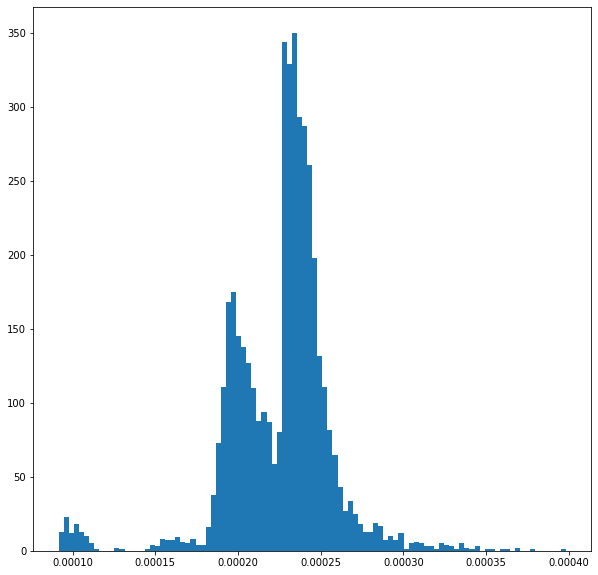

In [51]:
fig = plt.figure(1, figsize=(10,10))
h=plt.hist(pr.values(),100)